In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import scipy.special
from scipy.stats import norm


In [5]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import display, display_png, display_svg, clear_output
from IPython.core.pylabtools import print_figure

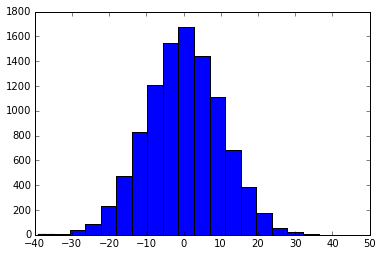

In [6]:
@interact(x_0 =(-80,80,0.1), l = (200, 900, 1), M = (10,100,10), NA = (0.5, 2.0, 0.1), NoiseCenter = (-200, 200, 10), NoiseWidth = (0, 200, 10))
def plot_NormDist(NoiseCenter = 0, NoiseWidth = 100):

    noise = np.random.normal(loc=NoiseCenter,scale=NoiseWidth,size=10000)

    hist(noise,20)

0.617088475108


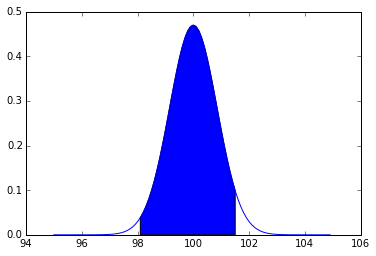

In [8]:
@interact(Center = (0, 200, 5), Spread = (0, 50, 1), Cutoff1 = (90,110,0.1), Cutoff2 = (90,110,0.1))
def plot_NormDist(Center = 100, Spread = 2, Cutoff1 = 98, Cutoff2 = 100):
    
    step = 0.1
    xdata = arange(95,105,step)
    
    #Center = 100.0
    #Cutoff1 = 100.0   # Must be less than Cutoff2 to work!
    #Cutoff2 = 103.0  # Must be greater than Cutoff1 to work!
    #Spread = 2.0
    percent = norm.cdf(Cutoff2,Center,Spread)-norm.cdf(Cutoff1,Center,Spread)
    Sigma = Spread/(2*sqrt(2*math.log(2)))
    fillfactorx = arange(Cutoff1,Cutoff2,step)
    fillfactory = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(fillfactorx-Center)**2/(2*Sigma**2))
    
    NormalDistribution = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(xdata-Center)**2/(2*Sigma**2))
    
    plot(xdata,NormalDistribution)
    fill_between(fillfactorx, 0, fillfactory)
    
    print percent
